In [1]:
import sympy as sy
import sympy.physics.mechanics as me

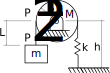

In [2]:
from IPython.core.display import SVG
SVG(filename='vib-ex1.svg')

In [3]:
q1 = me.dynamicsymbols('q1')

In [4]:
q1d = me.dynamicsymbols('q1',1)

In [5]:
m,M,k,L,H,R,g = sy.symbols('m M k L H R g')

In [6]:
N = me.ReferenceFrame('N')

In [7]:
A = me.ReferenceFrame('A')

In [8]:
A.orient(N,'Axis',[q1,N.z])
A.set_ang_vel(N,q1d*N.z)

In [9]:
A.ang_vel_in(N)

q1'*N.z

In [10]:
O = me.Point('O')
O.set_vel(N,0)

In [11]:
P1 = me.Point('P1')
P1_O = -R*A.y
P1.set_pos(O, P1_O)
P1.set_vel(N,P1_O.dt(N))
vP1=P1.vel(N)

In [12]:
vP1.express(A)

R*q1'*A.x

In [13]:
vP1.express(N)

R*cos(q1)*q1'*N.x + R*sin(q1)*q1'*N.y

In [14]:
P2 = me.Point('P2')
P2_O = P1_O - L*N.y
P2.set_pos(O,P2_O)
P2.set_vel(N,P2_O.dt(N))
vP2 = P2.vel(N)

In [15]:
vP2.express(N)

R*cos(q1)*q1'*N.x + R*sin(q1)*q1'*N.y

In [16]:
I = me.inertia(A, M/4*R**2, M/2*R**2, M/4*R**2)

In [17]:
Disco = me.RigidBody('Disco',O,A,M,(I,O))

In [18]:
Bloco = me.Particle('Bloco', P2,m)

In [19]:
Disco.potential_energy = M*g*H + k*(R*q1)**2

In [20]:
Bloco.potential_energy = m*g*(H-P2_O.dot(N.y))

In [21]:
Lag = me.Lagrangian(N,Bloco,Disco)

In [22]:
q = [q1]

In [23]:
l = me.LagrangesMethod(Lag,q)

In [24]:
le = l.form_lagranges_equations()

In [25]:
le.simplify()

In [26]:
le

Matrix([[R*(M*R*Derivative(q1(t), (t, 2)) + 8*R*k*q1(t) + 4*R*m*Derivative(q1(t), (t, 2)) - 4*g*m*sin(q1(t)))/4]])

In [27]:
q1dd_eq = sy.solve(le[0], (q1.diff()).diff())

In [28]:
q1dd_eq[0]

4*(-2*R*k*q1(t) + g*m*sin(q1(t)))/(R*(M + 4*m))

In [29]:
parametros = {m:0.5,M:1,R:0.2,g:9.8,k:20}

In [30]:
q1dd_eqn = q1dd_eq[0].subs(parametros)

In [31]:
import numpy as np
from scipy.integrate import odeint

In [32]:
t = np.linspace(0,10,1000)
X0 = [0.1,0]

In [33]:
def Modelo(X,t):
    qns = {q1:X[0],q1.diff():X[1]}
    q1dd_EQ = q1dd_eqn.subs(qns)
    q1d_EQ = X[1]
    return [q1d_EQ,q1dd_EQ]
    

In [34]:
X = odeint(Modelo,X0,t)

In [35]:
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150

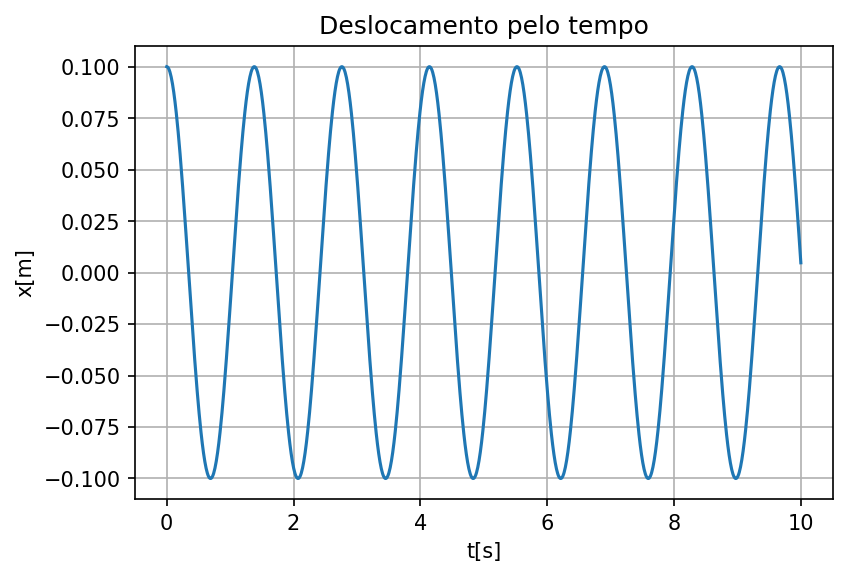

In [37]:
plt.figure()
plt.plot(t,X[:,0])
plt.xlabel('t[s]')
plt.ylabel('x[m]')
plt.title('Deslocamento pelo tempo')
plt.grid(True)

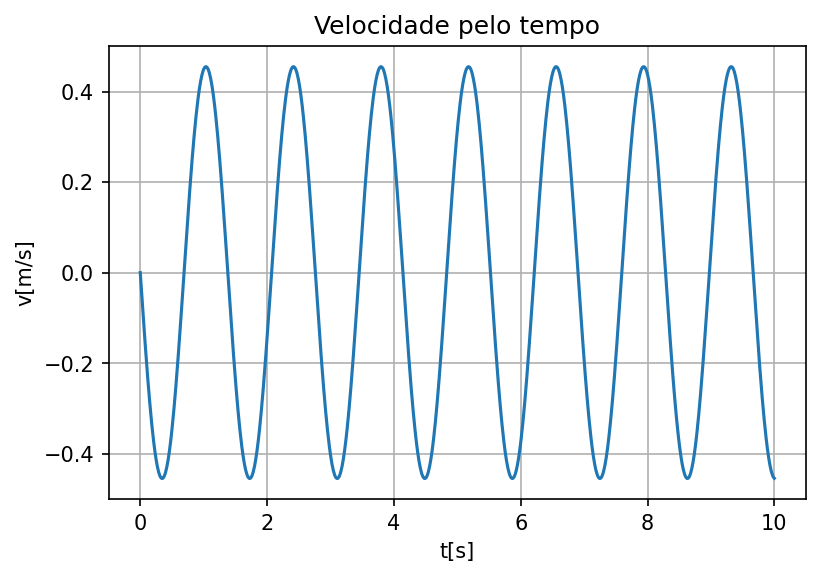

In [38]:
plt.figure()
plt.plot(t,X[:,1])
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.title('Velocidade pelo tempo')
plt.grid(True)

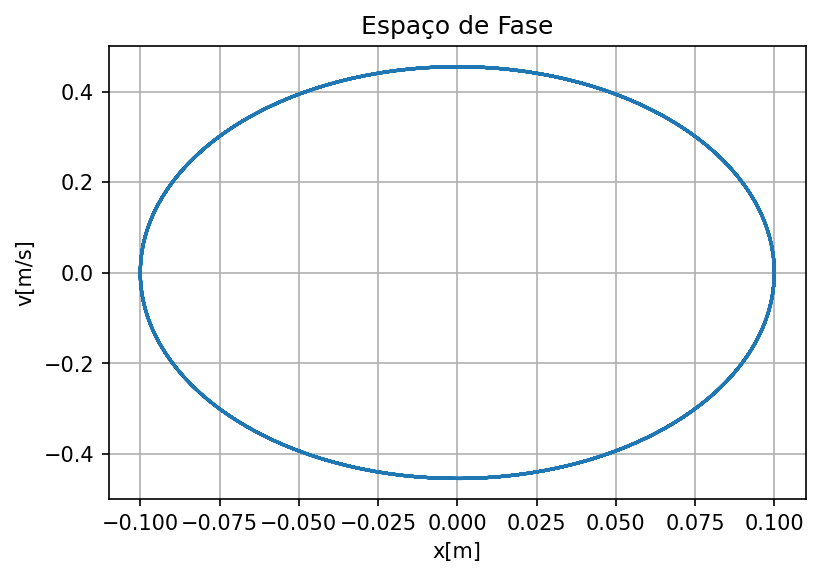

In [39]:
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.xlabel('x[m]')
plt.ylabel('v[m/s]')
plt.title('Espaço de Fase')
plt.grid(True)